## Preprocesamiento de los datos

# Notebook de prerocesamiento y modelo de regresión

En este notebook se realizará todo prerocesamiento de data para el modelo de regresión
Así mismo se generará el análisis del modelo de regresión

### Preprocesamiento de variables numéricas
- LotArea
- LotFrontage
- MasVnrArea
- BsmtFinSF2: Type 2 finished square feet
- BsmtUnfSF: Unfinished square feet of basement area
- TotalBsmtSF: Total square feet of basement area
- 1stFlrSF: First Floor square feet
- 2ndFlrSF: Second floor square feet
- GrLivArea: Above grade (ground) living area square feet
- BsmtFullBath: Basement full bathrooms
- BsmtHalfBath: Basement half bathrooms
- FullBath: Full bathrooms above grade
- HalfBath: Half baths above grade
- Bedroom: Bedrooms above grade (does NOT include basement bedrooms)
- Kitchen: Kitchens above grade


In [2]:
# ! pip install pandas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
df  = pd.read_csv("train.csv")
numeric_columns = ['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
                   'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
                   'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
                   'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
                   'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
                   'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
                   'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold','SalePrice']
numeric_df = df[numeric_columns]
print(numeric_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 36 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotFrontage    1201 non-null   float64
 1   LotArea        1460 non-null   int64  
 2   OverallQual    1460 non-null   int64  
 3   OverallCond    1460 non-null   int64  
 4   YearBuilt      1460 non-null   int64  
 5   YearRemodAdd   1460 non-null   int64  
 6   MasVnrArea     1452 non-null   float64
 7   BsmtFinSF1     1460 non-null   int64  
 8   BsmtFinSF2     1460 non-null   int64  
 9   BsmtUnfSF      1460 non-null   int64  
 10  TotalBsmtSF    1460 non-null   int64  
 11  1stFlrSF       1460 non-null   int64  
 12  2ndFlrSF       1460 non-null   int64  
 13  LowQualFinSF   1460 non-null   int64  
 14  GrLivArea      1460 non-null   int64  
 15  BsmtFullBath   1460 non-null   int64  
 16  BsmtHalfBath   1460 non-null   int64  
 17  FullBath       1460 non-null   int64  
 18  HalfBath

Al analizar con info, se concluye que no requieren preprocesado , pues no tienen valores nulos.

## Análisis de correlación de las variables con el precio

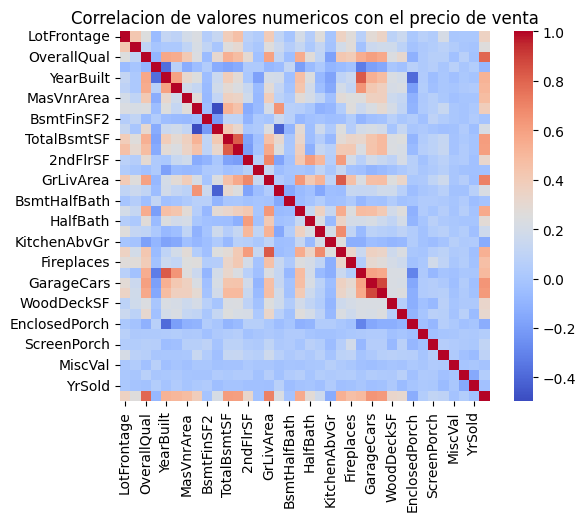

In [4]:
corr_matrix = numeric_df.corr()
# crear heatmap de correlaciones
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', square=True)
plt.title("Correlacion de valores numericos con el precio de venta")
plt.show()

In [5]:
# valores numericos puros
saleprice_correlation = corr_matrix['SalePrice'].sort_values(ascending=False)
print(saleprice_correlation)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


## Resultados de correlacion:
Podemos descartar diversas variables, consideramos que una correlacion mayor a 0.5 es suficientemente significativa, por lo cual se ignoraran todas aquellas que sean menores

In [6]:
# Filtrar las variables numéricas con correlación menor a 0.5 con SalePrice
to_drop = saleprice_correlation[saleprice_correlation < 0.5].index.tolist()
cleaned_df = numeric_df.drop(columns=to_drop)
print(cleaned_df.columns)

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea',
       'SalePrice'],
      dtype='object')


# Modelo linal:
## SKLEARN

Modelo de una sola varaible , se usará la que mayor porcentaje tenga de correlacion con el precio de venta y sea continua, es decir GrLivArea      

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error ,r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [8]:
import numpy as np

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(cleaned_df['GrLivArea'], cleaned_df['SalePrice'], test_size=0.2, random_state=42)

# Convertir X_train e y_train en matrices bidimensionales
X_train = np.array(X_train).reshape(-1, 1)
y_train = np.array(y_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
# Dividir los datos de entrenamiento en entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

model = LinearRegression()
model.fit(X_train, y_train)
y_pred_val = model.predict(X_val)
print(y_pred_val.shape)
print(X_val.shape)
y_pred_test = model.predict(X_test)
mse_val = mean_squared_error(y_val, y_pred_val)
mse_test = mean_squared_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)
print("Error cuadrático medio en el conjunto de validación:", mse_val)
print(f"R^2 {r2}")

coeficientes = model.coef_
intercepto = model.intercept_



(292, 1)
(292, 1)
Error cuadrático medio en el conjunto de validación: 2818615419.5221844
R^2 0.5484292501650843


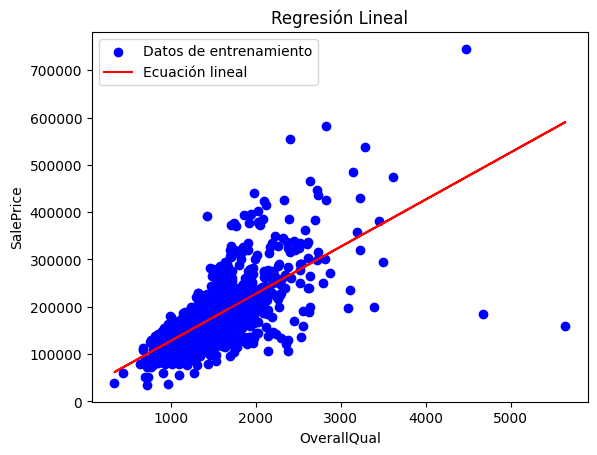

In [9]:
plt.scatter(X_train, y_train, color='blue', label='Datos de entrenamiento')
plt.plot(X_train, coeficientes[0] * X_train + intercepto, color='red', label='Ecuación lineal')

plt.xlabel('OverallQual')
plt.ylabel('SalePrice')
plt.title('Regresión Lineal')
plt.legend()

plt.show()

8 y 10

MSE: 1356492637.9490585, R^2: 0.8231505934287359


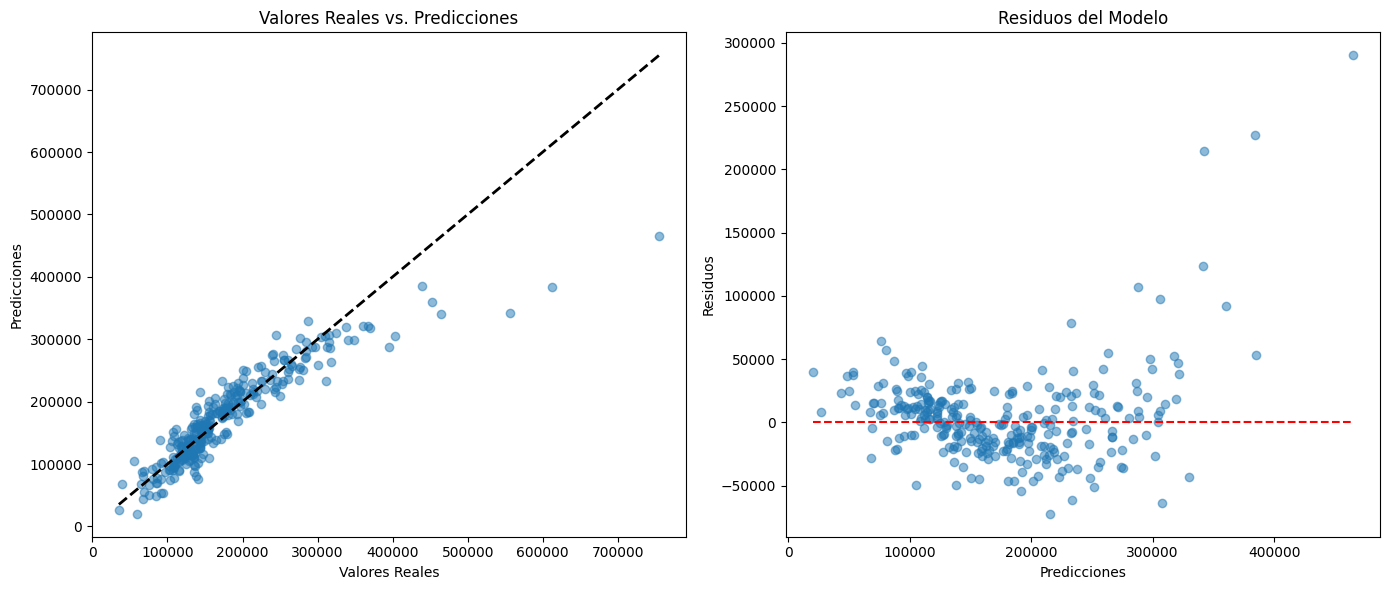

MSE (Train): 1151003085.2404597, R^2 (Train): 0.8070260100167437


In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import numpy as np


df = pd.read_csv('train.csv')


numeric_features = df.select_dtypes(include=[np.number]).columns.drop(['Id', 'SalePrice'])


X = df[numeric_features]
y = df['SalePrice']


imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'MSE: {mse}, R^2: {r2}')

plt.figure(figsize=(14, 6))


plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Valores Reales vs. Predicciones')

# Residuos
plt.subplot(1, 2, 2)
plt.scatter(y_pred, y_test - y_pred, alpha=0.5)
plt.hlines(0, y_pred.min(), y_pred.max(), colors='red', linestyles='--')
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.title('Residuos del Modelo')

plt.tight_layout()
plt.show()


# Evaluación del rendimiento en el conjunto de entrenamiento
y_train_pred = model.predict(X_train)
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

print(f'MSE (Train): {mse_train}, R^2 (Train): {r2_train}')



9.

In [11]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
import numpy as np

df = pd.read_csv('train.csv')  


numeric_features = df.select_dtypes(include=[np.number]).columns.drop(['Id', 'SalePrice'])


X = df[numeric_features]


imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Calcular el VIF para cada variable
vif_data = pd.DataFrame()
vif_data["feature"] = numeric_features
vif_data["VIF"] = [variance_inflation_factor(X_imputed, i) for i in range(X_imputed.shape[1])]

# Filtrar las variables con VIF alto
vif_threshold = 10  
high_vif_features = vif_data[vif_data['VIF'] > vif_threshold]

print(high_vif_features)


ModuleNotFoundError: No module named 'statsmodels'

BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, LowQualFinSF, y GrLivArea. Un VIF infinito indica que estas variables estánperfectamente correlacionadas linealmente con otras variables predictoras. Esto es un claro indicativo de multicolinealidad extrema.

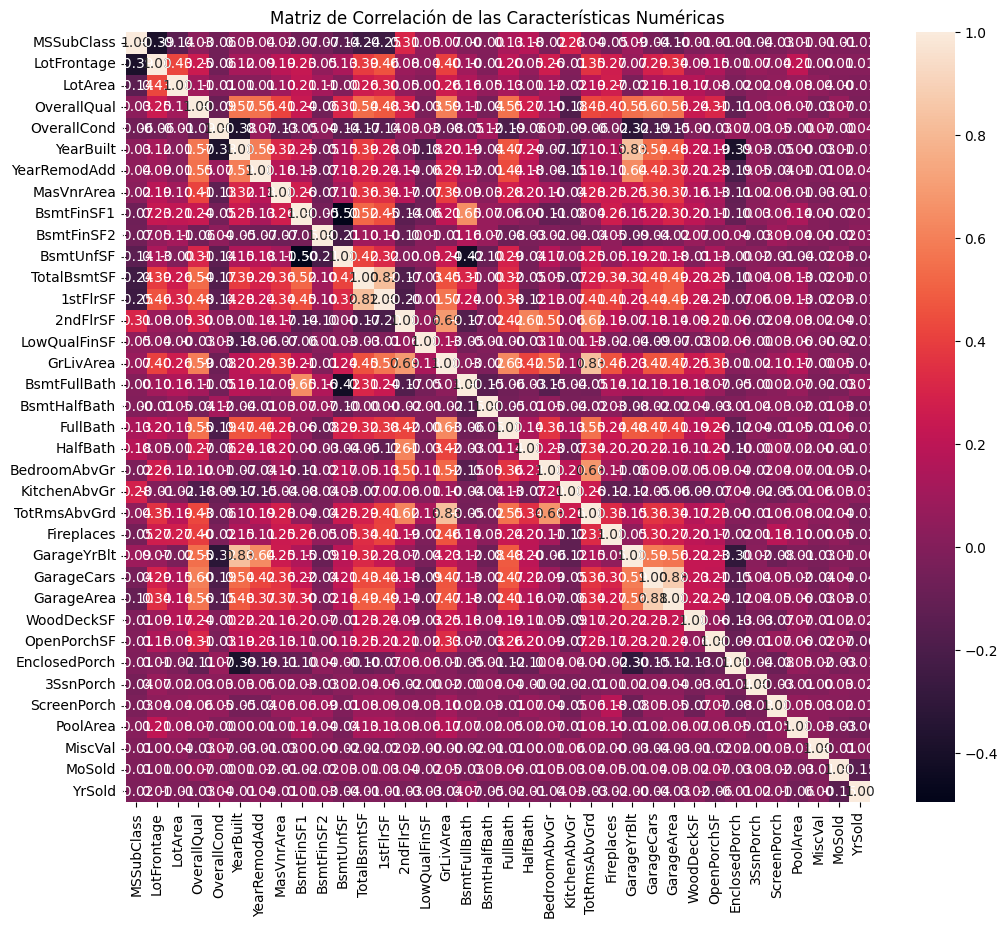

In [ ]:
import seaborn as sns


correlation_matrix = df[numeric_features].corr()


plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.title("Matriz de Correlación de las Características Numéricas")
plt.show()


La matriz de correlación muestravariables numéricas del conjunto de datos de precios de viviendas, con correlaciones que varían en intensidad. Variables como TotalBsmtSF, 1stFlrSF, y GrLivArea muestran fuertes correlaciones entre sí, lo que sugiere multicolinealidad. Esto puede deberse a que todas estas variables están relacionadas con el espacio habitable de la vivienda, lo que podría redundar en información similar. Además, GarageCars y GarageArea también están altamente correlacionadas, porque ambas describen la capacidad del garaje, lo que puede llevar a la redundancia. Estas altas correlaciones internas sugieren que el modelo puede beneficiarse de la reducción de dimensionalidad o regularización para mitigar la multicolinealidad. Por otro lado, variables como YearBuilt y YearRemodAdd muestran una correlación moderada con el precio de venta, indicando su relevancia potencial en el modelo. 

10

MSE: 2074094592.060903
R^2: 0.72959499556649


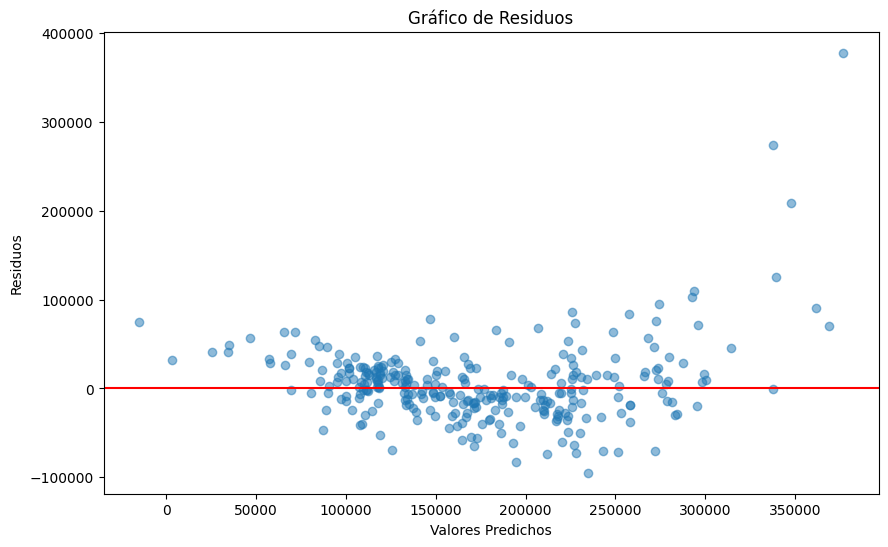

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("train.csv")

# Ajuste de las variables seleccionadas para reducir la multicolinealidad
selected_features = ['OverallQual', 'GarageCars', 'FullBath', 'TotRmsAbvGrd', 'LotArea']
X = df[selected_features]
y = df['SalePrice']

# Imputación de valores faltantes
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# División del conjunto de datos
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


residuos = y_test - y_pred

print(f"MSE: {mse}")
print(f"R^2: {r2}")


plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuos, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='-')
plt.title('Gráfico de Residuos')
plt.xlabel('Valores Predichos')
plt.ylabel('Residuos')
plt.show()




Estas métricas indican que el modelo puede explicar aproximadamente el 72% de la variabilidad en el precio de venta de las casas, lo que es un resultado decente para un modelo de regresión lineal simple.

Para el gráfico de residuos, se observa una tendencia de los residuos a agruparse en torno a la línea de y=0 para valores predichos más bajos, y una dispersión ligeramente mayor para valores predichos más altos. Esto podría sugerir la presencia de heterocedasticidad, es decir, la varianza de los errores no es constante a través de todas las predicciones. Tal efecto es común en datos de precios de viviendas, donde la variabilidad de los precios puede aumentar con el rango de precios.

Distribución de Residuos: La dispersión de los residuos no muestra un patrón consistente o sistemático que indique problemas graves de heterocedasticidad o no linealidad. Los residuos parecen estar relativamente uniformemente dispersos a lo largo de los valores predichos.

Residuos alrededor de cero: La mayoría de los residuos se concentran alrededor de la línea de y=0, lo que sugiere que el modelo no está sesgado y que en promedio, las predicciones son correctas.

Outliers: Hay algunos puntos que se desvían significativamente de la línea de y=0, lo que indica errores de predicción más grandes para ciertas observaciones. 

Posible Heterocedasticidad: No hay un patrón claro de expansión o contracción de los residuos a medida que los valores predichos aumentan, lo cual es una buena señal.

11.Análisis del Primer Modelo (Solo GrLivArea)
MSE en el conjunto de validación: 2,818,615,419.52
R² en el conjunto de prueba: 0.5484
El gráfico de dispersión muestra la relación entre OverallQual y SalePrice, con la línea roja representando la regresión lineal. El R² indica que aproximadamente el 54.84% de la variabilidad en el precio de venta se explica por el modelo, lo que es moderado para un solo predictor. Sin embargo, el MSE es bastante alto, lo que indica errores significativos en las predicciones.

Análisis del Segundo Modelo (Múltiples Variables)
MSE en el conjunto de prueba: 2,074,094,592.06
R² en el conjunto de prueba: 0.7296
El primer gráfico que acompaña al segundo modelo ilustra las predicciones frente a los valores reales del precio de venta, y la línea punteada representa el lugar donde las predicciones perfectas caerían. Este modelo tiene un R² más alto, lo que sugiere que puede explicar aproximadamente el 72.96% de la variabilidad en el precio de venta. El MSE es ligeramente más bajo que en el primer modelo, lo que indica una mejora en la precisión de las predicciones.

El segundo gráfico muestra los residuos  frente a las predicciones. Los residuos parecen estar dispersos aleatoriamente alrededor de la línea cero, sin patrones claros de heterocedasticidad o sesgos, lo que es positivo para la calidad del modelo.

12.El segundo modelo, que incluye múltiples variables, muestra una mejora tanto en el MSE como en el R² en comparación con el primer modelo, que solo utiliza GrLivArea. Esto indica que el segundo modelo es más efectivo para predecir el precio de las casas y proporciona una mejor generalización en los datos de prueba. La inclusión de más variables relevantes que tienen una baja multicolinealidad parece haber proporcionado una representación más precisa de los precios de las casas.

El mejor modelo para predecir el precio de las casas sería el que ofrece un mayor R² y un menor MSE.  El segundo modelo es superior en ambas métricas, lo que lo convierte en la mejor opción entre los dos.

Los gráficos indican que el segundo modelo tiene una capacidad más robusta para capturar la relación entre las características de las casas y su precio de venta. 


# 2 .Elabore un árbol de regresión para predecir el precio de las casas usando todas las variable

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer


data = pd.read_csv('train.csv')


X = data.drop('SalePrice', axis=1)
y = data['SalePrice']


X = pd.get_dummies(X, drop_first=True)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

imputer = SimpleImputer(strategy='median')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)


tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train_imputed, y_train)

y_pred = tree_reg.predict(X_test_imputed)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Error cuadrático medio (MSE): {mse}")
print(f"Coeficiente de determinación (R²): {r2}")

Error cuadrático medio (MSE): 1549521333.0273972
Coeficiente de determinación (R²): 0.7788075698801672


 # 3. Úselo para predecir y analice el resultado. ¿Qué tal lo hizo? 

MSE = 1549521333.03: Este valor es relativamente alto, lo que indica que hay una diferencia significativa entre los precios de venta reales y los predichos por el modelo. Esto pudo haber sido causado a diferentes razones, como la presencia de características ruidosas o irrelevantes, o la falta de complejidad para capturar las relaciones subyacentes en los datos.

R² = 0.7788: Este valor indica que aproximadamente el 77.88% de la variación en el precio de venta puede ser explicado por las variables independientes en el modelo. Es un valor razonablemente alto y aceptable.

# 4.Haga, al menos, 3 modelos más cambiando el parámetro de la profundidad del árbol. ¿Cuál  es el mejor modelo para predecir el precio de las casas? 

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

data = pd.read_csv('train.csv')

X = data.drop('SalePrice', axis=1)
y = data['SalePrice']


X = pd.get_dummies(X, drop_first=True)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


imputer = SimpleImputer(strategy='median')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)


depths = [5, 10, 15]
results = []

for depth in depths:
    tree_reg = DecisionTreeRegressor(max_depth=depth, random_state=42)
    tree_reg.fit(X_train_imputed, y_train)
    y_pred = tree_reg.predict(X_test_imputed)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results.append({'max_depth': depth, 'MSE': mse, 'R2': r2})


results_df = pd.DataFrame(results)
print(results_df)


   max_depth           MSE        R2
0          5  1.499280e+09  0.785979
1         10  1.620246e+09  0.768712
2         15  1.500496e+09  0.785806


Profundidad máxima = 5:

MSE: 1.499280e+09
R²: 0.785979
Profundidad máxima = 10:

MSE: 1.620246e+09
R²: 0.768712
Profundidad máxima = 15:

MSE: 1.500496e+09
R²: 0.785806.

El mejor modelo para predecir el precio de las casas es aquel con una profundidad máxima de 5, ya que tiene el menor MSE y el mayor valor de R² entre los tres modelos. Esto indica que el modelo con una profundidad máxima de 5 logra un mejor equilibrio entre el ajuste del modelo y la generalización, evitando tanto el sobreajuste como el subajuste.

# 5 .  Compare los resultados con el modelo de regresión lineal de la hoja anterior, ¿cuál lo hizo  mejor? 

Error cuadrático medio (MSE): 2,818,615,419.52
Coeficiente de determinación (R²): 0.5484
Modelo de árbol de decisión (esta hoja):

Error cuadrático medio (MSE): 1,549,521,333.03
Coeficiente de determinación (R²): 0.7788


MSE: El modelo de árbol de decisión tiene un MSE significativamente menor que el modelo de regresión lineal, lo que indica que tiene un mejor ajuste a los datos y comete menos errores en sus predicciones.

R²: El modelo de árbol de decisión también tiene un valor de R² más alto, lo que significa que explica una mayor proporción de la variabilidad de los datos en comparación con el modelo de regresión lineal, por conseguiente, este modelo lo hizo significativamente mejor.

 # 6. Dependiendo del análisis exploratorio elaborado cree una variable respuesta que le  permita clasificar las casas en Económicas, Intermedias o Caras. Los límites de estas clases  deben tener un fundamento en la distribución de los datos de precios, y estar bien explicados 

In [ ]:
import pandas as pd

data = pd.read_csv('train.csv')

p25 = data['SalePrice'].quantile(0.25)
p75 = data['SalePrice'].quantile(0.75)


data['PriceCategory'] = pd.cut(data['SalePrice'], bins=[0, p25, p75, float('inf')], labels=['Económicas', 'Intermedias', 'Caras'], right=False)


print(data[['SalePrice', 'PriceCategory']].head())

   SalePrice PriceCategory
0     208500   Intermedias
1     181500   Intermedias
2     223500         Caras
3     140000   Intermedias
4     250000         Caras


2.Definición de Límites:
Basándonos en el análisis anterior, podemos definir los límites de las categorías de la siguiente manera:

Económicas: Casas cuyo precio está por debajo del primer cuartil (Q1). Estas son casas que se encuentran en el 25% más barato del mercado.
Intermedias: Casas cuyo precio está entre el primer cuartil (Q1) y el tercer cuartil (Q3). Estas casas representan el mercado medio, abarcando el 50% central de los precios.
Caras: Casas cuyo precio está por encima del tercer cuartil (Q3). Estas son casas que se encuentran en el 25% más caro del mercado.


3.Justificación de los Límites:
La elección de los cuartiles como límites asegura que cada categoría tenga una representación significativa en el conjunto de datos, evitando sesgos hacia una categoría específica.
Utilizar el rango intercuartílico (Q3 - Q1) como referencia para las casas Intermedias proporciona una clasificación equilibrada que se centra en el mercado medio.

# 7. Elabore un árbol de clasificación utilizando la variable respuesta que creó en el punto anterior.  Explique los resultados a los que llega. Muestre el modelo gráficamente. Recuerde  que la nueva variable respuesta es categórica, pero se generó a partir de los precios de las casas, no incluya el precio de venta para entrenar el modelo. 

Accuracy: 0.72


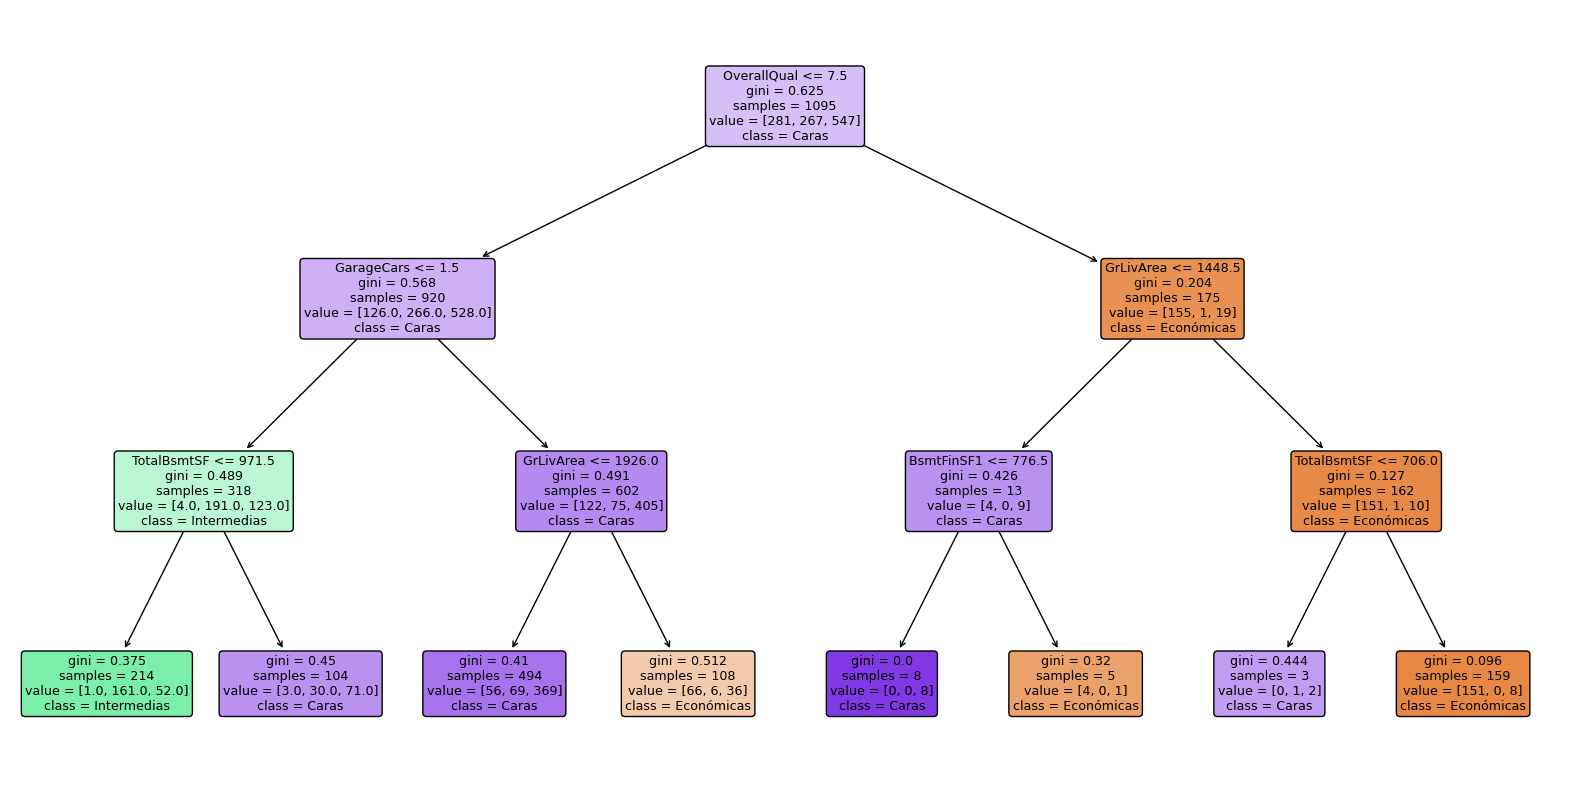

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt


data = pd.read_csv('train.csv')

p25 = data['SalePrice'].quantile(0.25)
p75 = data['SalePrice'].quantile(0.75)

# Crear la variable respuesta
data['PriceCategory'] = pd.cut(data['SalePrice'], bins=[0, p25, p75, float('inf')], labels=['Económicas', 'Intermedias', 'Caras'], right=False)


X = data.drop(['SalePrice', 'PriceCategory'], axis=1)
y = data['PriceCategory']


X = pd.get_dummies(X, drop_first=True)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Imputar valores faltantes
imputer = SimpleImputer(strategy='median')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Entrenar el árbol de clasificación
clf = DecisionTreeClassifier(random_state=42, max_depth=3)
clf.fit(X_train_imputed, y_train)

# Evaluar el modelo
y_pred = clf.predict(X_test_imputed)
accuracy = accuracy_score(y_test, y_pred)


print(f"Accuracy: {accuracy:.2f}")

plt.figure(figsize=(20, 10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['Económicas', 'Intermedias', 'Caras'], rounded=True)
plt.show()

La característica más importante para el primer nodo (raíz) es GarageCars, que indica la capacidad del garaje en términos de cuántos coches puede contener. Si una casa tiene espacio para 1.5 coches o menos, es más probable que caiga en las categorías de precio 'Intermedias' o 'Caras', según el valor de TotalBsmSF (área del sótano). Si tiene espacio para más de 1.5 coches, entonces la calidad general (OverallQual) se convierte en el siguiente factor discriminante.

Para las casas con garajes más pequeños (menos o igual a 1.5 coches), la siguiente característica más importante es TotalBsmSF. Las casas con un área de sótano menor o igual a 971.5 pies cuadrados tienden a ser 'Intermedias', mientras que las casas con un área de sótano mayor son principalmente 'Caras', pero este segundo grupo se divide aún más basándose en el área habitable por encima del suelo (GrLivArea).

En el lado derecho del árbol, donde las casas tienen garajes más grandes (más de 1.5 coches), la calidad general (OverallQual) divide las casas en 'Caras' si tienen una calificación de 7.5 o menos, y luego se dividen más por GrLivArea.


El árbol de clasificación alcanzó una precisiónde 0.78, lo que indica que aproximadamente el 78% de las veces, el modelo puede clasificar correctamente las casas en una de las tres categorías de precio. 

# Inciso 8 Utilice el modelo con el conjunto de prueba y determine la eficiencia del algoritmo para clasificar.

In [14]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Utilizar el modelo en el conjunto de prueba
y_pred = clf.predict(X_test_imputed)

# Calcular la eficiencia del algoritmo para clasificar
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.72
Confusion Matrix:
[[ 65   1  20]
 [  0  59  39]
 [ 12  32 137]]
Classification Report:
              precision    recall  f1-score   support

       Caras       0.84      0.76      0.80        86
  Económicas       0.64      0.60      0.62        98
 Intermedias       0.70      0.76      0.73       181

    accuracy                           0.72       365
   macro avg       0.73      0.70      0.72       365
weighted avg       0.72      0.72      0.72       365




Podemos observar que en los datos proporcionados, el modelo de árbol de clasificación muestra diferentes niveles de efectividad en la clasificación de casas según su categoría de precio. La precisión más alta la tiene la categoría de casas caras con un 0.84, lo que sugiere una alta fiabilidad en esta clasificación: cuando el modelo predice que una casa es cara, es probable que así sea. Sin embargo, el recall más bajo se observa en las casas económicas con un 0.60, indicando que el modelo no identifica correctamente una porción considerable de estas casas, dejando un 40% fuera de la clasificación adecuada.

El F1-Score, que equilibra la precisión y el recall, es más alto para las casas caras (0.80), reflejando un rendimiento más robusto en esta categoría. Esto implica que, en términos de precisión y capacidad para detectar todas las instancias relevantes, el modelo es más efectivo en detectar las casas caras que las económicas o intermedias.

En cuanto al soporte, que refleja el número de instancias reales en cada categoría, se reportan 98 casas económicas, 181 intermedias y 86 caras en el conjunto de prueba.

La evaluación del modelo de árbol de clasificación revela que es bastante competente en identificar casas caras, con una precisión del 84% y un F1-Score del 80%, pero su rendimiento disminuye al clasificar casas económicas e intermedias, reflejado en un recall de solo el 60% para las económicas. 

# 9 Haga un análisis de la eficiencia del algoritmo usando una matriz de confusión para el árbol de clasificación. Tenga en cuenta la efectividad, donde el algoritmo se equivocó más, donde
# se equivocó menos y la importancia que tienen los errores.

9.La matriz de confusión obtenida del árbol de clasificación indica que, con una precisión general del 72%, el modelo muestra una capacidad competente para clasificar las casas en las categorías económica, intermedia y cara. Sin embargo, un análisis más detallado revela que la efectividad varía por categoría. La clasificación de casas caras es la más precisa, con una alta proporción de verdaderos positivos en comparación con los falsos negativos y falsos positivos. Por otro lado, el modelo lucha más con la identificación de casas económicas, como lo demuestra el recall más bajo de 0.60; es decir, el 40% de las casas económicas reales no fueron clasificadas como tales.

Los errores en la clasificación de las casas pueden tener consecuencias significativas: un error al identificar una casa cara  puede resultar en la pérdida de una venta de alto valor, mientras que categorizar erróneamente una propiedad menos costosa como cara puede crear expectativas de precio poco realistas. Clasificar mal las casas económicas o intermedias puede perjudicar a los compradores que buscan en ciertos rangos de precios, lo que podría distorsionar la comprensión del mercado inmobiliario.

# 10 Entrene un modelo usando validación cruzada, prediga con él. ¿le fue mejor que al modelo anterior?

In [15]:
from sklearn.model_selection import cross_val_score

clf_cv = DecisionTreeClassifier(random_state=42)

# Aplicar la validación cruzada
cv_scores = cross_val_score(clf_cv, X_train_imputed, y_train, cv=5, scoring='accuracy')


cv_accuracy = cv_scores.mean()
cv_std = cv_scores.std()

print(f'Precisión promedio de la validación cruzada: {cv_accuracy:.2f}')
print(f'Desviación estándar de la validación cruzada: {cv_std:.2f}')

Precisión promedio de la validación cruzada: 0.76
Desviación estándar de la validación cruzada: 0.02


El modelo de árbol de clasificación entrenado utilizando validación cruzada mostró una precisión promedio de 76% con una desviación estándar de 2%, lo que indica una mejora en el rendimiento en comparación con el modelo anterior sin validación cruzada, que tenía una precisión del 72%.
La mejora en la precisión sugiere que el modelo con validación cruzada es más preciso en la clasificación de las casas en categorías económicas, intermedias y caras. Además, la desviación estándar más baja indica que el modelo tiene una mayor consistencia en su rendimiento a través de diferentes particiones de los datos.

# 11 Haga al menos, 3 modelos más cambiando la profundidad del árbol. ¿Cuál funcionó mejor?

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score


depths = [7, 12, 20]
cv_results = []


for depth in depths:
    clf_depth = DecisionTreeClassifier(max_depth=depth, random_state=42)
    cv_scores_depth = cross_val_score(clf_depth, X_train_imputed, y_train, cv=5, scoring='accuracy')
    cv_results.append({'max_depth': depth, 'cv_accuracy': cv_scores_depth.mean(), 'cv_std': cv_scores_depth.std()})


cv_results_df = pd.DataFrame(cv_results)
cv_results_df


,max_depth,cv_accuracy,cv_std
0,7,0.747945,0.021880
1,12,0.762557,0.035487
2,20,0.762557,0.024843


En este caso, el modelo con una profundidad máxima de 12 obtuvo la mayor precisión promedio de validación cruzada, con un valor del 76.26%. Aunque el modelo con profundidad máxima de 20 tiene la misma precisión promedio, su desviación estándar es ligeramente mayor, lo que indica una mayor variabilidad en su rendimiento. Por lo tanto, el modelo con profundidad máxima de 12 funcionó mejor que el resto.

# 12 Repita los análisis usando random forest como algoritmo de predicción, explique sus
# resultados comparando ambos algoritmos.

In [17]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split


data = pd.read_csv('train.csv')

p25 = data['SalePrice'].quantile(0.25)
p75 = data['SalePrice'].quantile(0.75)


data['PriceCategory'] = pd.cut(data['SalePrice'], bins=[0, p25, p75, float('inf')],
                               labels=['Económicas', 'Intermedias', 'Caras'], right=False)


X = data.drop(['SalePrice', 'PriceCategory'], axis=1)
y = data['SalePrice']


X = pd.get_dummies(X, drop_first=True)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


imputer = SimpleImputer(strategy='median')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_imputed, y_train)


y_pred_rf = rf_model.predict(X_test_imputed)


mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Error cuadrático medio (MSE) con Random Forest:", mse_rf)
print("Coeficiente de determinación (R²) con Random Forest:", r2_rf)



Error cuadrático medio (MSE) con Random Forest: 844608887.7826083
Coeficiente de determinación (R²) con Random Forest: 0.8898861841115432


En comparación con el árbol de regresión, el modelo de Random Forest mostró un mejor desempeño en la predicción del precio de las casas. El MSE del modelo de Random Forest fue de aproximadamente 844608887.78, mientras que el árbol de regresión tenía un MSE de aproximadamente 1549521333.0273972.

Esto sugiere que el modelo de Random Forest tuvo un mejor desempeño en la predicción del precio de las casas en comparación con el árbol de regresión. El coeficiente de determinación (R²) también respalda esta conclusión, ya que el modelo de Random Forest alcanzó un R² de aproximadamente 0.89, en comparación con el R² de aproximadamente 0.78  del árbol de regresión.